In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
#import datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print('Train shape: {}\nTest shape: {}'.format(train.shape,test.shape))

Train shape: (42000, 785)
Test shape: (28000, 784)


In [5]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y = train.pop('label') #Label for digits

In order to show image it has to be transformed to sqrt(784) x sqrt(784) matrix.

In [7]:
data = train.to_numpy()


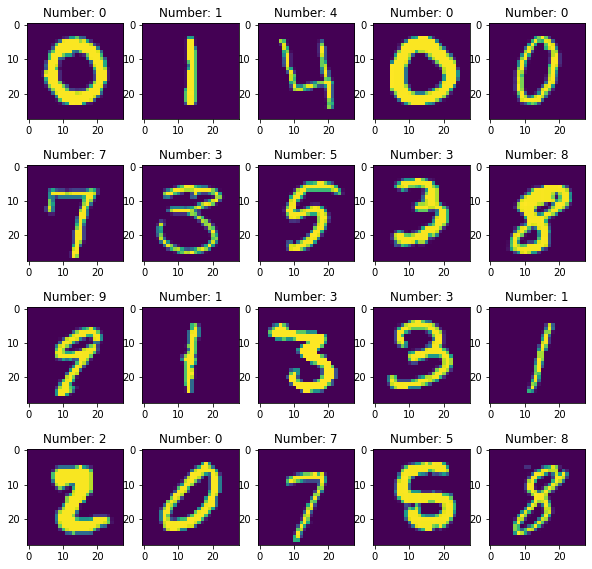

In [8]:
plt.figure(figsize = (10,10))
for i in range(1,21):
    plt.subplot(4,5,i)
    img = data[i].reshape(28,28)
    plt.imshow(img)
    plt.title('Number: {}'.format(y[i]))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data,y,test_size = 0.2,shuffle = False,random_state = 42)

In [13]:
#normalize values
X_train = X_train/255.0
X_test = X_test/255.0

In [17]:
input_shape = X_train.shape[1]
#BUILD A MODEL
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[input_shape]),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(256,activation = 'relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(10, activation = 'sigmoid')
])
#BUILD A CALLBACK
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001,
    patience=10,
    restore_best_weights=True,
)
#BUILD A LEARNING RATE CHANGES
from tensorflow.keras.callbacks import ReduceLROnPlateau
lr_schedule = ReduceLROnPlateau(
    patience=0,
    factor=0.2,
    min_lr=0.001,
)
#MODEL COMPLIE
model.compile(
optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)


In [18]:
#MODEL FIT
history = model.fit(
    X_train, y_train,
    validation_data=(X_test,y_test),
    batch_size=128,
    epochs=500,
    callbacks = [early_stopping,lr_schedule]
)


Epoch 1/500
263/263 [==============================] - 9s 29ms/step - loss: 0.8601 - accuracy: 0.7350 - val_loss: 0.2029 - val_accuracy: 0.9425
Epoch 2/500
263/263 [==============================] - 8s 29ms/step - loss: 0.2404 - accuracy: 0.9262 - val_loss: 0.1180 - val_accuracy: 0.9629
Epoch 3/500
263/263 [==============================] - 8s 29ms/step - loss: 0.1761 - accuracy: 0.9461 - val_loss: 0.1056 - val_accuracy: 0.9673
Epoch 4/500
263/263 [==============================] - 11s 43ms/step - loss: 0.1539 - accuracy: 0.9523 - val_loss: 0.0976 - val_accuracy: 0.9701
Epoch 5/500
263/263 [==============================] - 11s 41ms/step - loss: 0.1274 - accuracy: 0.9611 - val_loss: 0.0924 - val_accuracy: 0.9723
Epoch 6/500
263/263 [==============================] - 9s 34ms/step - loss: 0.1155 - accuracy: 0.9644 - val_loss: 0.0876 - val_accuracy: 0.9731
Epoch 7/500
263/263 [==============================] - 10s 38ms/step - loss: 0.1013 - accuracy: 0.9685 - val_loss: 0.0866 - val_accura

In [202]:
print('X_train shape: {}\ny_train shape: {}\nX_test shape: {}\ny_test shape: {}'.format(X_train.shape,y_train.shape,X_test.shape,y_test.shape))

X_train shape: (29399, 784)
y_train shape: (29399,)
X_test shape: (12601, 784)
y_test shape: (12601,)


In [19]:
history_df = pd.DataFrame(history.history)

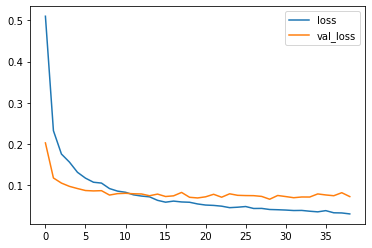

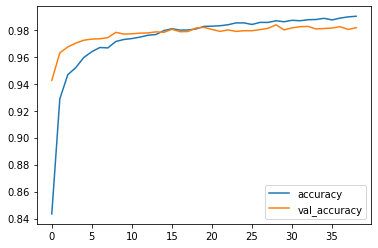

In [20]:
history_df.loc[:, ['loss', 'val_loss']].plot()

history_df.loc[:, ['accuracy', 'val_accuracy']].plot()

plt.show()

In [21]:
print('Maximum reached valid accuracy: {:.4}\nMinimum reached valid_loss: {:.4}'.format(history_df['val_accuracy'].max(),history_df['val_loss'].min()))

Maximum reached valid accuracy: 0.9837
Minimum reached valid_loss: 0.0665


In [23]:
test = test.to_numpy()


AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [24]:
test = test/255.0

In [25]:
prediction = model.predict(test)

In [27]:
np.argmax(prediction[0])

2

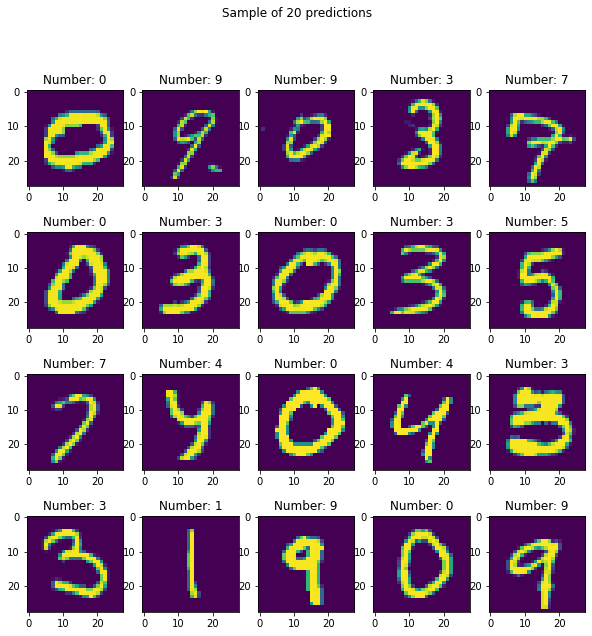

In [32]:
plt.figure(figsize = (10,10))
for i in range(1,21):
    plt.subplot(4,5,i)
    img = test[i].reshape(28,28)
    plt.imshow(img)
    plt.title('Number: {}'.format(np.argmax(prediction[i])))
plt.suptitle('Sample of 20 predictions')
plt.show()